In [1]:
from __future__ import print_function
import os

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

from ind_rnn import IndRNNCell, RNN

batch_size = 100
num_classes = 10
epochs = 50
hidden_units = 128

learning_rate = 1e-3







In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], -1, 1)
x_test = x_test.reshape(x_test.shape[0], -1, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784, 1)
60000 train samples
10000 test samples


In [3]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

cells = [IndRNNCell(hidden_units),
         IndRNNCell(hidden_units)]

print('Evaluate IRNN...')
model = Sequential()
model.add(RNN(cells,  input_shape=x_train.shape[1:]))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

W0121 02:20:54.504440 140220370143040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0121 02:20:54.521331 140220370143040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

/home/jupyter/workspace/Project/Keras_Irnn/adding_Irnn/ind_rnn.py:143: UserWarning: IndRNNCell: Number of timesteps could not be determined. 
Defaulting to max clipping range of 1.0. 
If this model was trained using a specific timestep during training, inference may be wrong due to this default setting.
Please ensure that you use the same number of timesteps during training and evaluation
  warnings.warn("IndRNNCell: Number of timesteps could not be determined. \n"
W0121 02:20:54.525719 140220370143040 deprecati

Evaluate IRNN...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rnn_1 (RNN)                  (None, 128)               17024     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 18,314
Trainable params: 18,314
Non-trainable params: 0
_________________________________________________________________


In [4]:
#rmsprop = Adam(lr=learning_rate, amsgrad=True)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[ModelCheckpoint('weights/imdb_indrnn_mnist.h5', monitor='val_acc',
                                     save_best_only=True, save_weights_only=True, mode='max')])
#hist= model.fit(x_train, y_train.squeeze().argmax(axis=1), epochs=100,validation_data=(x_test, y_test.squeeze().argmax(axis=1)))

model.load_weights('weights/imdb_indrnn_mnist.h5')



W0121 02:20:57.892310 140220370143040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0121 02:20:57.922804 140220370143040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0121 02:20:58.048659 140220370143040 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0121 02:20:58.286662 140220370143040 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 368s 6ms/step - loss: 1.5843 - acc: 0.3995 - val_loss: 1.4051 - val_acc: 0.4345
Epoch 2/50
60000/60000 [==============================] - 367s 6ms/step - loss: 1.3100 - acc: 0.5095 - val_loss: 1.2663 - val_acc: 0.5329
Epoch 3/50
60000/60000 [==============================] - 366s 6ms/step - loss: 1.2403 - acc: 0.5387 - val_loss: 1.2105 - val_acc: 0.5617
Epoch 4/50
60000/60000 [==============================] - 366s 6ms/step - loss: 1.2062 - acc: 0.5580 - val_loss: 1.1967 - val_acc: 0.5635
Epoch 5/50
60000/60000 [==============================] - 366s 6ms/step - loss: 1.1933 - acc: 0.5635 - val_loss: 1.1957 - val_acc: 0.5587
Epoch 6/50
60000/60000 [==============================] - 366s 6ms/step - loss: 1.1743 - acc: 0.5707 - val_loss: 1.1350 - val_acc: 0.5900
Epoch 7/50
60000/60000 [==============================] - 366s 6ms/step - loss: 1.1756 - acc: 0.5723 - val_loss: 1.1841 - 

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print('IndRNN test score:', scores[0])
print('IndRNN test accuracy:', scores[1])

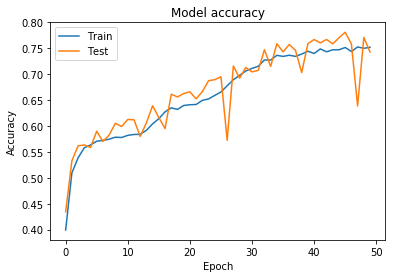

In [10]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


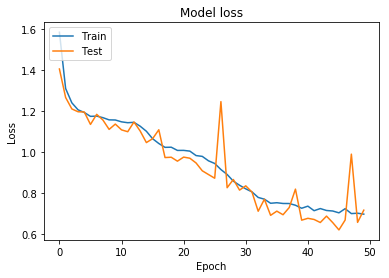

In [11]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()